In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from elasticsearch import Elasticsearch

%matplotlib inline

In [70]:
es = Elasticsearch(['elastic:9200'])

res = es.search(index='games_test', body={
    "size": 100,
    "query": {"match": {
        "genres": "Action"
    }}
})
hits = res['hits']['total']
print("Got %d hits" % hits)

Got 84 hits


In [71]:
def categories_data(response):
    categories = set()
    numbers = []
    ctg = []
    data = {}
    for val in response['hits']['hits']:
        for ct in val['_source']['categories']:
            categories.add(ct)
            ctg.append(ct)
    for ct in categories:
        numbers.append(ctg.count(ct))
    data['categories'] = list(categories)
    data['count'] = numbers
    return pd.DataFrame.from_dict(data)

ctg_data = categories_data(res)
ctg_data.head(20)

,categories,count
0,PvP,26
1,Score Attack,1
2,Free to Play,33
3,Mythology,1
4,Character Customization,8
5,Swordplay,1
6,Classic,21
7,Fantasy,8
8,Mod,4
9,Dark Humor,3


In [72]:
print("Numbers of categories for Action genre: %d" % len(ctg_data))

Numbers of categories for Action genre: 170


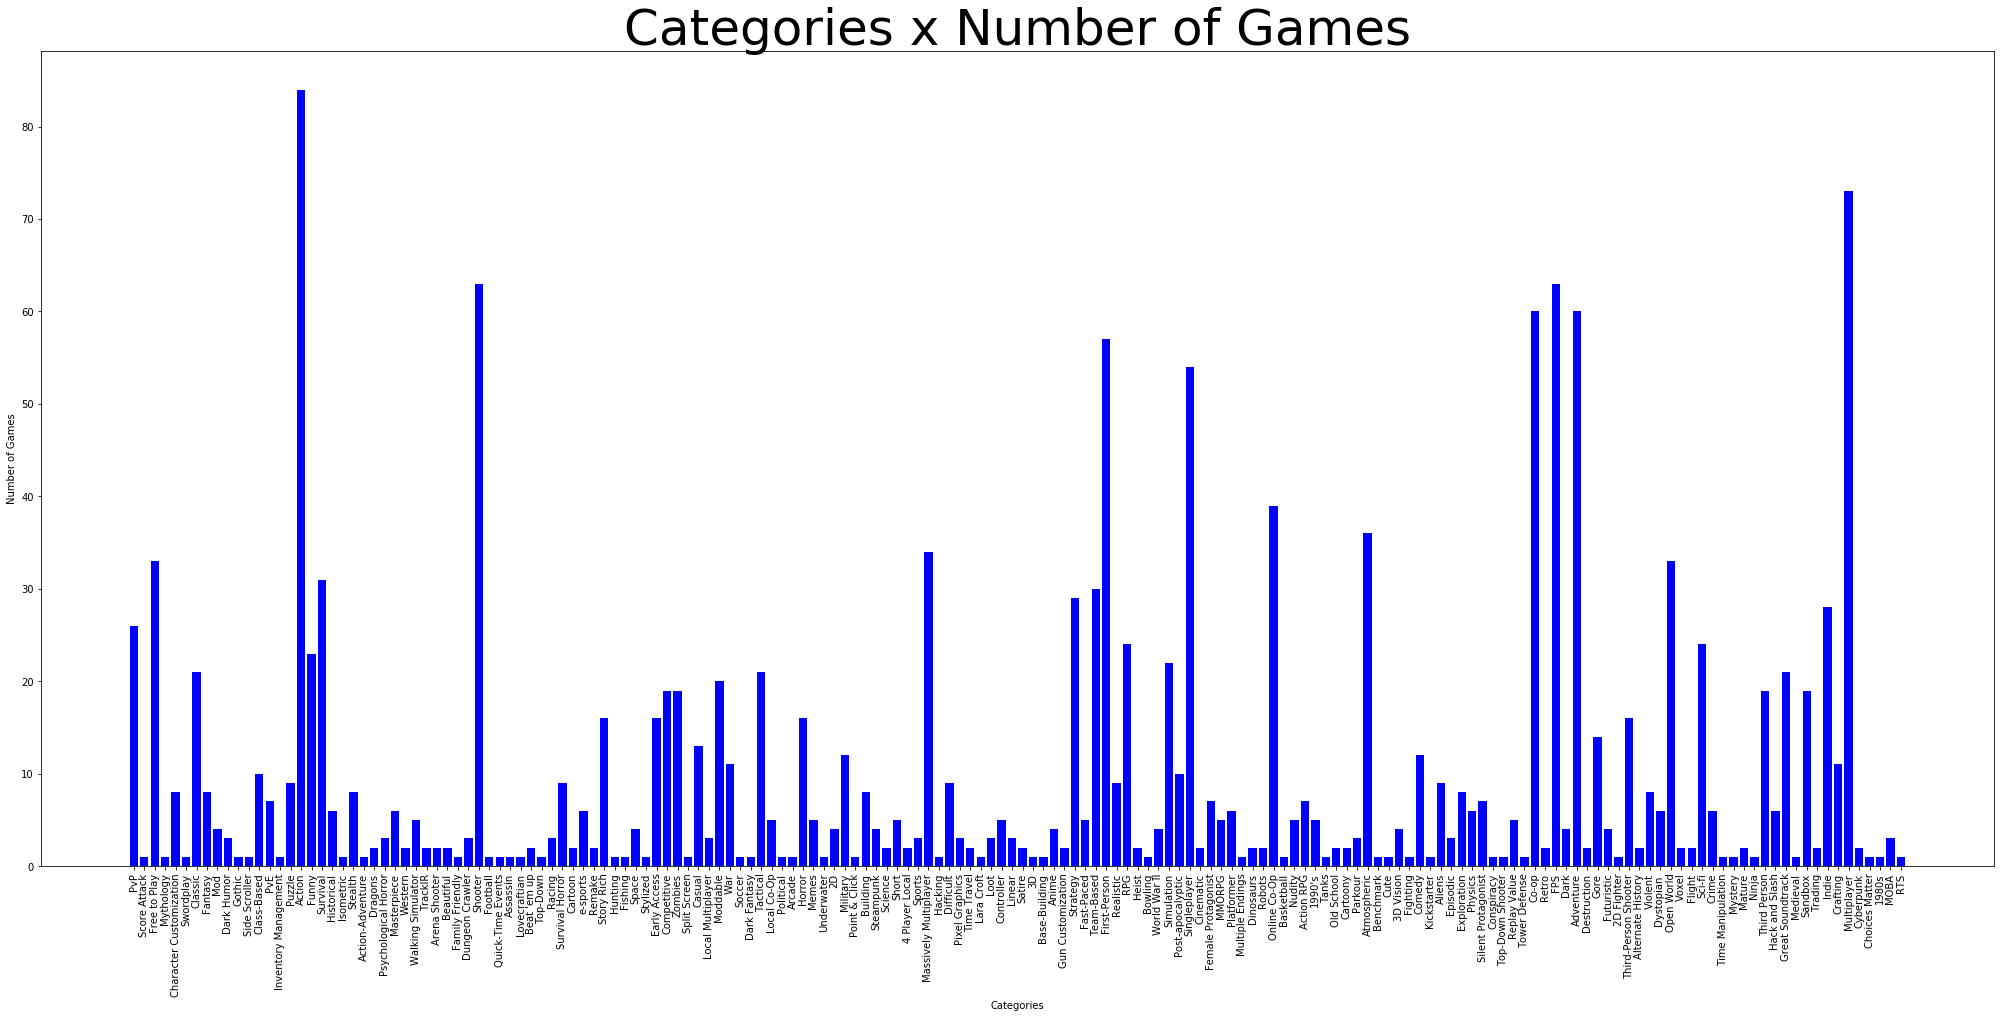

In [91]:
plt.figure(figsize=(35,15), facecolor='w')
plt.xlabel('Categories')
plt.ylabel('Number of Games')
plt.title('Categories x Number of Games', fontdict={'fontsize': 50})
plt.bar(ctg_data['categories'], ctg_data['count'], color='blue', width=0.8)
plt.xticks(rotation=90)
plt.show()

In [74]:
ctg_data.sort_values(['count']).head(20)

,categories,count
169,RTS,1
34,Football,1
35,Quick-Time Events,1
36,Assassin,1
37,Lovecraftian,1
77,Hacking,1
124,Kickstarter,1
122,Fighting,1
120,Cute,1
119,Benchmark,1


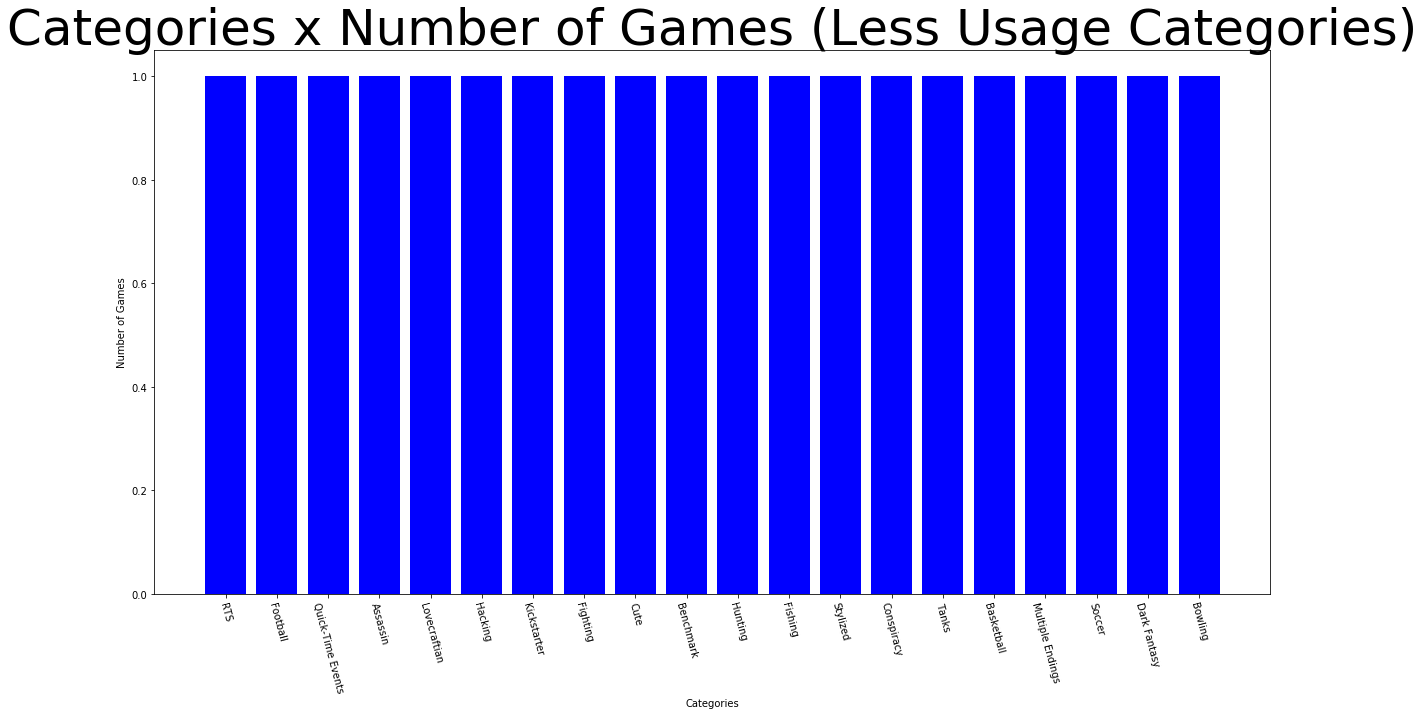

In [75]:
ascending_data = ctg_data.sort_values(['count']).head(20)
plt.figure(figsize=(20,10), facecolor='w')
plt.xlabel('Categories')
plt.ylabel('Number of Games')
plt.title('Categories x Number of Games (Less Usage Categories)', fontdict={'fontsize': 50})
plt.bar(ascending_data['categories'], ascending_data['count'], color='blue', width=0.8, )
plt.xticks(rotation=-75)
plt.show()

In [76]:
ctg_data.sort_values(['count'], ascending=[False]).head(20)

,categories,count
16,Action,84
164,Multiplayer,73
33,Shooter,63
136,FPS,63
134,Co-op,60
138,Adventure,60
93,First-Person,57
101,Singleplayer,54
109,Online Co-Op,39
118,Atmospheric,36


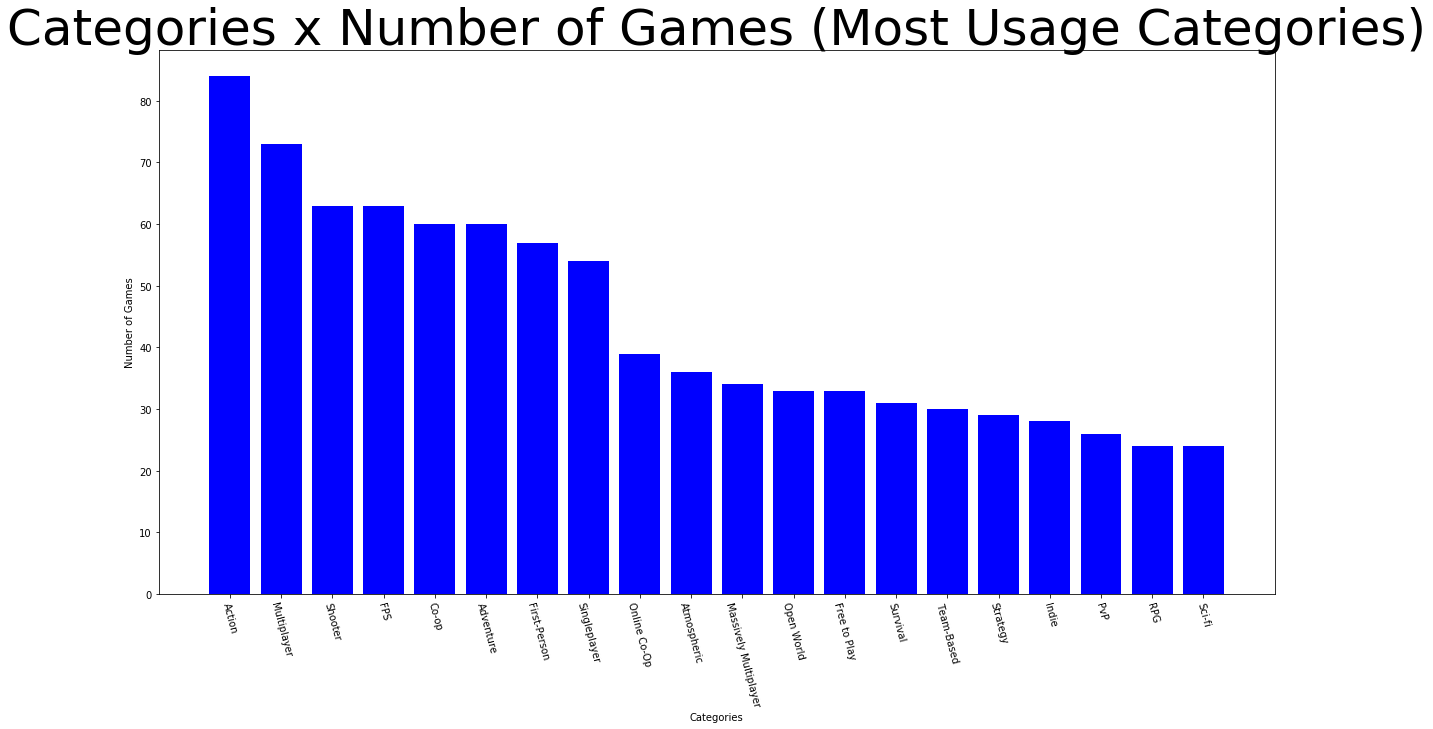

In [77]:
descending_data = ctg_data.sort_values(['count'], ascending=[False]).head(20)
plt.figure(figsize=(20,10), facecolor='w')
plt.xlabel('Categories')
plt.ylabel('Number of Games')
plt.title('Categories x Number of Games (Most Usage Categories)', fontdict={'fontsize': 50})
plt.bar(descending_data['categories'], descending_data['count'], color='blue', width=0.8, )
plt.xticks(rotation=-75)
plt.show()

In [78]:
def number_of_owners(response):
    num_own = 0
    for val in response['hits']['hits']:
        num_own += val['_source']['owners']
        
    return num_own

num_own = number_of_owners(res)
print("Got %d number of owners" % num_own)

Got 955000000 number of owners


In [79]:
print("Avarege of number of owners of Action genre: %d" % (num_own / hits))

Avarege of number of owners of Action genre: 11369047


In [80]:
def initialize_map(response):
    categories_map = {}
    for val in response['hits']['hits']:
        for ctg in val['_source']['categories']:
            categories_map[ctg] = 0
    return categories_map

ctg_map = initialize_map(res)

In [81]:
def ctg_x_owners(response, ctg_map):
    data = {}
    for val in response['hits']['hits']:
         for ctg in val['_source']['categories']:
                ctg_map[ctg] += val['_source']['owners']
    data['categories'] = list(ctg_map.keys())
    data['owners'] = list(ctg_map.values())
    return pd.DataFrame.from_dict(data)

ctg_owners_data = ctg_x_owners(res, ctg_map)
ctg_owners_data.head(20)

,categories,owners
0,Action,955000000
1,FPS,683500000
2,Shooter,672000000
3,Multiplayer,889000000
4,Singleplayer,444000000
5,Tactical,309000000
6,First-Person,611500000
7,Competitive,421500000
8,Team-Based,514500000
9,Classic,171500000


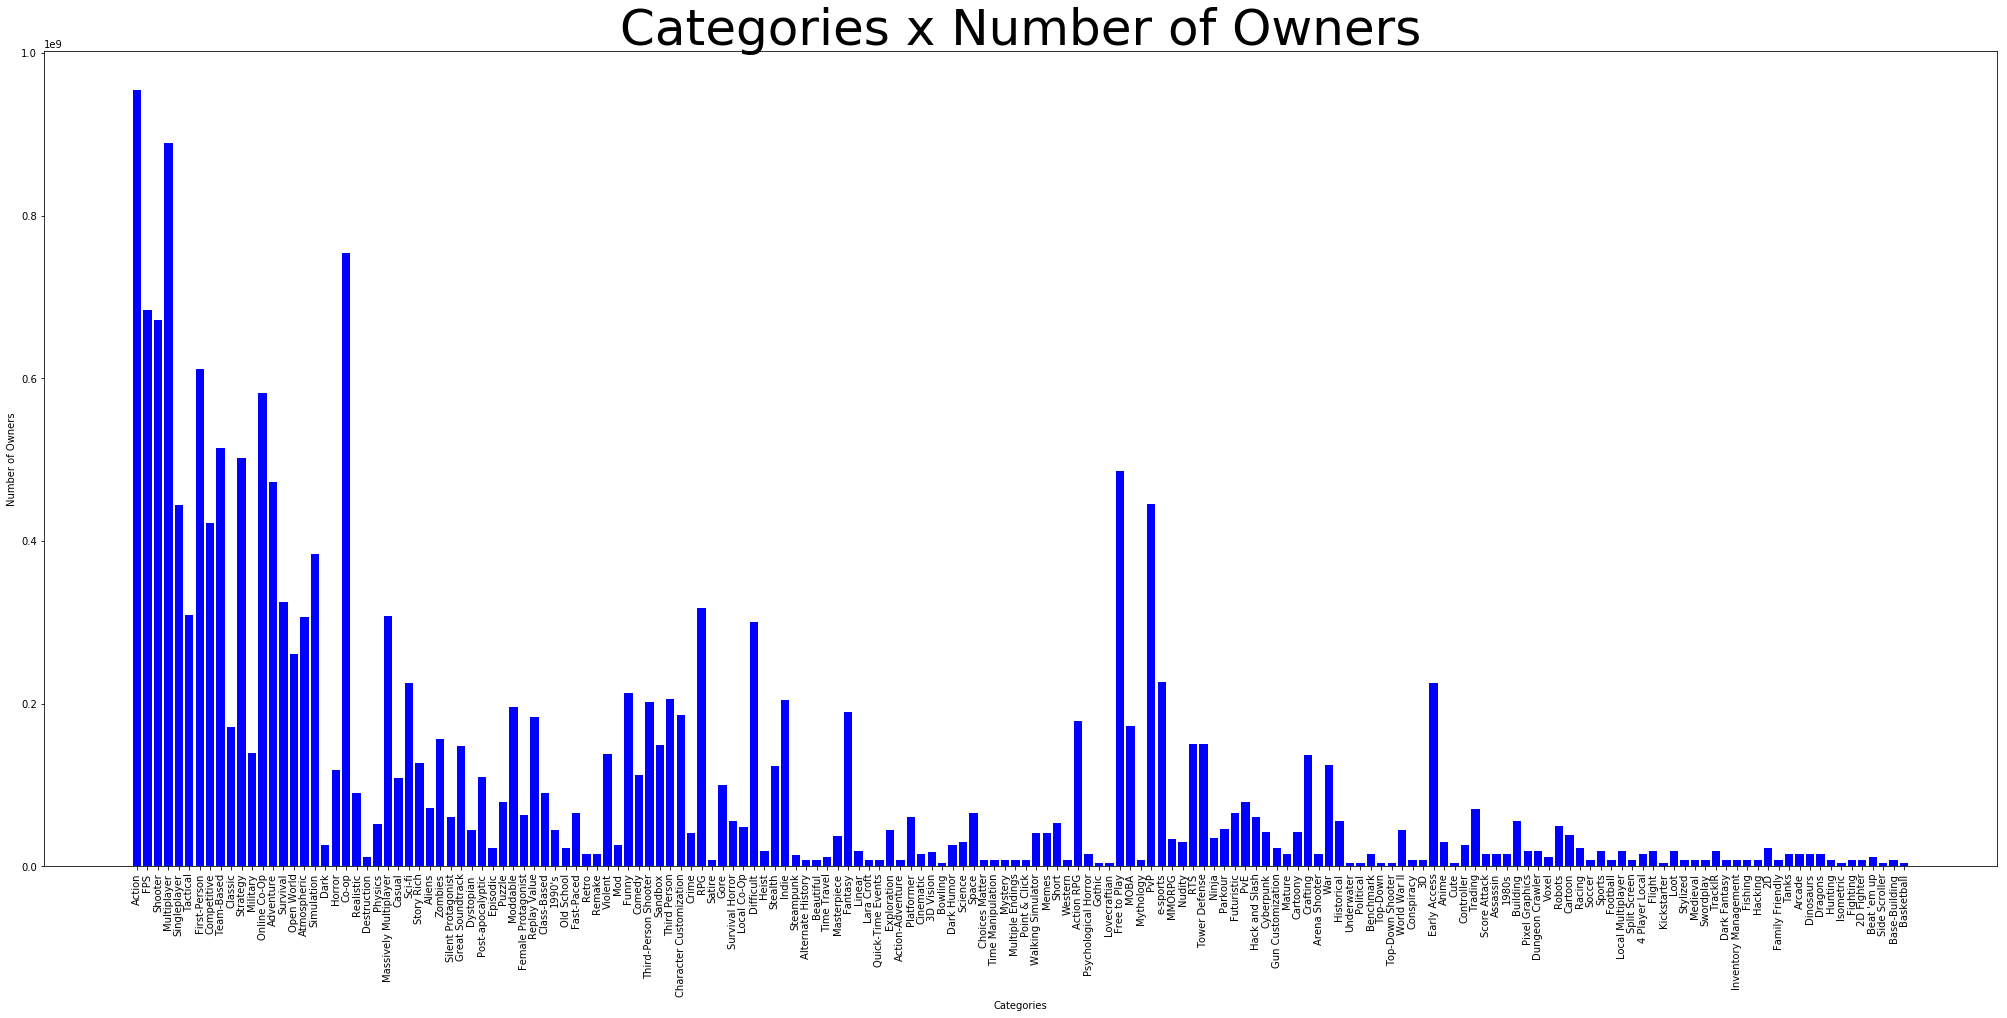

In [94]:
plt.figure(figsize=(35,15), facecolor='w')
plt.xlabel('Categories')
plt.ylabel('Number of Owners')
plt.title('Categories x Number of Owners', fontdict={'fontsize': 50})
plt.bar(ctg_owners_data['categories'], ctg_owners_data['owners'], color='blue', width=0.8)
plt.xticks(rotation=90)/
plt.show()

In [83]:
ctg_owners_data.sort_values(['owners']).head(20)

,categories,owners
169,Basketball,3500000
167,Side Scroller,3500000
77,Bowling,3500000
163,Isometric,3500000
92,Gothic,3500000
93,Lovecraftian,3500000
116,Underwater,3500000
117,Political,3500000
119,Top-Down,3500000
120,Top-Down Shooter,3500000


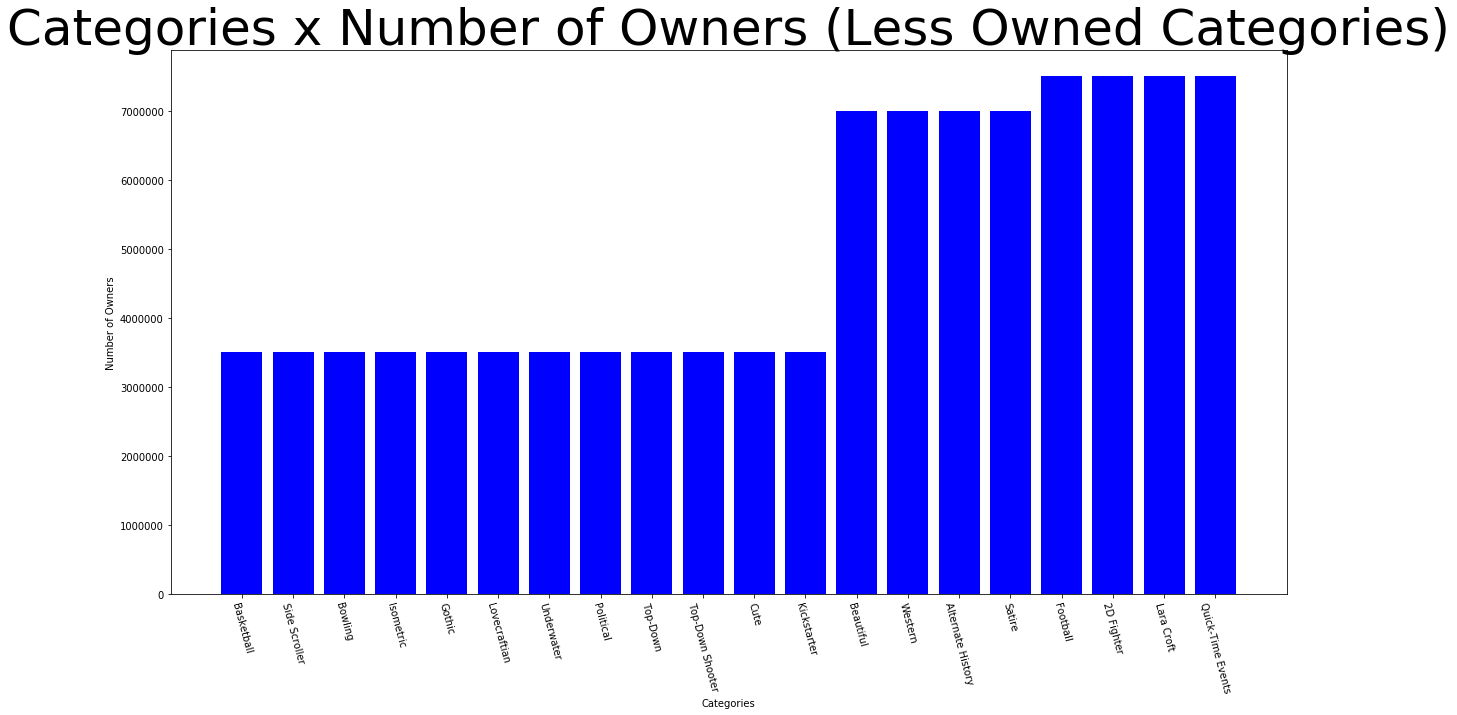

In [84]:
ascending_data = ctg_owners_data.sort_values(['owners']).head(20)
plt.figure(figsize=(20,10), facecolor='w')
plt.xlabel('Categories')
plt.ylabel('Number of Owners')
plt.title('Categories x Number of Owners (Less Owned Categories)', fontdict={'fontsize': 50})
plt.bar(ascending_data['categories'], ascending_data['owners'], color='blue', width=0.8, )
plt.xticks(rotation=-75)
plt.show()

In [85]:
ctg_owners_data.sort_values(['owners'], ascending=[False]).head(20)

,categories,owners
0,Action,955000000
3,Multiplayer,889000000
20,Co-op,754000000
1,FPS,683500000
2,Shooter,672000000
6,First-Person,611500000
12,Online Co-Op,582000000
8,Team-Based,514500000
10,Strategy,502000000
94,Free to Play,485500000


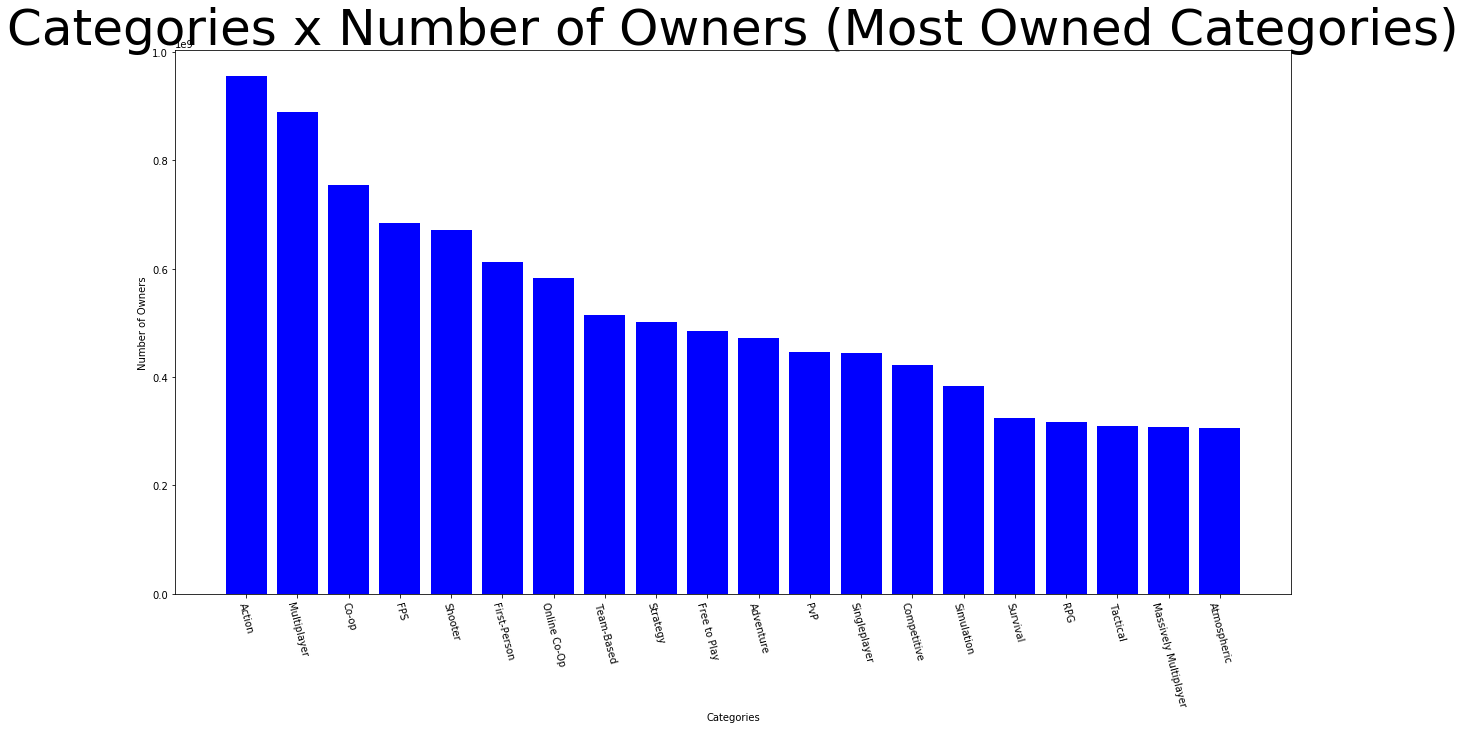

In [86]:
descending_data = ctg_owners_data.sort_values(['owners'], ascending=[False]).head(20)
plt.figure(figsize=(20,10), facecolor='w')
plt.xlabel('Categories')
plt.ylabel('Number of Owners')
plt.title('Categories x Number of Owners (Most Owned Categories)', fontdict={'fontsize': 50})
plt.bar(descending_data['categories'], descending_data['owners'], color='blue', width=0.8, )
plt.xticks(rotation=-75)
plt.show()